<a href="https://colab.research.google.com/github/ArelyA/CE888_2020_Data-Science/blob/master/CE888_Lab7_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network**

## Import Libraries

In [0]:
from keras import layers
from keras import models
# MNIST images
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


* The convnet takes as input tensors of the following **shape** *(not including the batch dimension)*
      tensor_shape(image_height, image_width, image_channels) 

* The convnet was configured to process inputs of size (28, 28, 1), which is the format of MNIST images
  * This is done by passing the argument **input_shape** to the first layer
        input_shape = (28, 28, 1)


## **Exercise:**

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.

## Instantiating a Small Convolutional Neural Network

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### Adding a Classifier on Top of the Convolutional Neural Network

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

## Training the Convolutional Neural Network on MNIST Images

### Load Data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Compile and Fit Model

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 45s 947us/step - loss: 0.7598 - acc: 0.7421 - val_loss: 0.2294 - val_acc: 0.9274
Epoch 2/5
48000/48000 [==============================] - 45s 932us/step - loss: 0.1727 - acc: 0.9476 - val_loss: 0.1851 - val_acc: 0.9424
Epoch 3/5
48000/48000 [==============================] - 45s 930us/step - loss: 0.1191 - acc: 0.9645 - val_loss: 0.0969 - val_acc: 0.9683
Epoch 4/5
48000/48000 [==============================] - 45s 939us/step - loss: 0.0961 - acc: 0.9712 - val_loss: 0.0781 - val_acc: 0.9787
Epoch 5/5
48000/48000 [==============================] - 45s 945us/step - loss: 0.0821 - acc: 0.9755 - val_loss: 0.0774 - val_acc: 0.9772


### Evaluate Model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 320us/step


0.9795

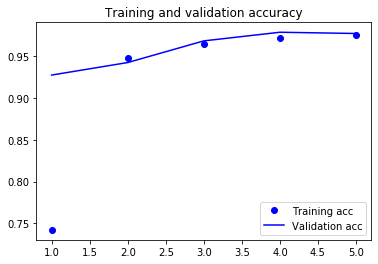

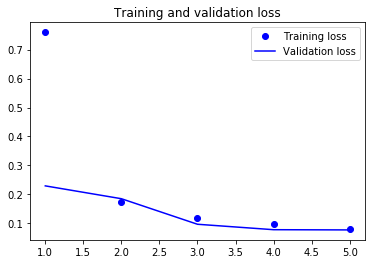

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()